[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-2)]: Done 243 out of 243 | elapsed:   12.0s finished


best parameters: {'bias': 0.5, 'leak_rate': 0.4, 'n_inputs': 1, 'n_outputs': 1, 'n_reservoir': 200, 'sparsity': 0.1, 'spectral_radius': 0.8, 'teacher_forcing': True}
best parameters index: 129
best score: 0.00020097879626519797


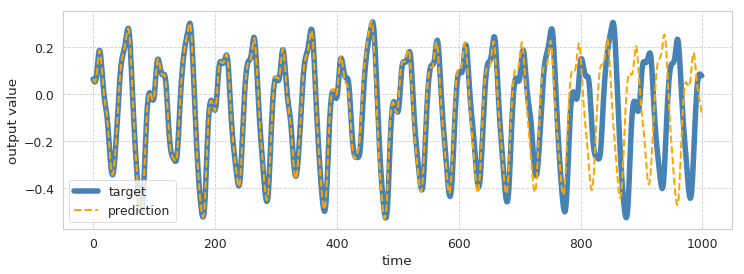

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from echoes import ESNGenerative
from echoes.datasets import load_mackeyglasst17
from echoes.model_selection import GridSearchESNGenerative
from echoes.plotting import plot_predicted_ts, set_mystyle
set_mystyle()


data = load_mackeyglasst17().reshape(-1, 1)[: 5000]
y_train, y_test = train_test_split(data, shuffle=False, test_size=0.2)

param_grid = dict(
    # Fixed params
    n_inputs=[1],
    n_outputs=[1],
    teacher_forcing=[True],
    # Variable params
    n_reservoir=[100, 150, 200],
    sparsity=[0, .1, .8,],
    bias=[0, 0.5, 1],
    spectral_radius=[.8, .9, .95],
    leak_rate=[.2, .4, .6],
)

grid = GridSearchESNGenerative(
    param_grid=param_grid,
    test_size=0.3,
    scoring=mean_squared_error,
    strip_transient=False,
    verbose=5,
    n_jobs=-2
).fit(None, y_train)

print("best parameters:", grid.best_params_)
print("best parameters index:", grid.best_params_idx_)
print("best score:", grid.best_score_)

# Instantiate model with best paramenter constellation
esn = ESNGenerative(**grid.best_params_).fit(None, y_train)

pred = esn.predict(n_steps=y_test.shape[0])
plot_predicted_ts(y_test, pred, figsize=(12, 4))

In [24]:
# We can export results as pandas DataFrame
grid.to_dataframe().head()

# or as cvs
grid.to_dataframe().to_csv("filename")